# Setting Environment

In [0]:
from google.colab import drive  # to mount Drive to Colab notebook

# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the data path on your drive
path = './gdrive/My Drive/Colab Demo Data/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Check if GPU working

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Collecting Data from Twitter API

In [0]:
import tweepy                   # Python wrapper around Twitter API
import json
import csv
from datetime import date
from datetime import datetime
import time

from tweepy import API 
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

from textblob import TextBlob
 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

In [0]:
auth = tweepy.OAuthHandler('xxxxxx', 'xxxxxx')
auth.set_access_token('xxxxx-xxxx', 'xxxxxx')
api = tweepy.API(auth)

In [0]:

screen_name = 'realdonaldtrump' #'LeoDiCaprio'

# 抓取用户主页上的时间轴里的内容
public_tweets = api.user_timeline(screen_name, count=200)
 
# Tweets
tweets_pub = [[tweet.id_str, tweet.author.name, tweet.author.id_str, tweet.created_at, tweet.text, tweet.retweet_count, tweet.favorite_count] 
              for tweet in public_tweets]

df_tweets_pub = pd.DataFrame(data=tweets_pub, 
                 columns=['id', 'author', 'author_id', 'date', 'tweets', 'retweets','likes'])

df_tweets_pub['tweets_orig']=df_tweets_pub['tweets']

# 去除重複
df_tweets_pub = df_tweets_pub.drop_duplicates(['tweets'])
# 去除空白
df_tweets_pub.dropna(subset=['tweets'], inplace=True)

df_tweets_pub

,id,author,author_id,date,tweets,retweets,likes,tweets_orig
0,1236980284744241154,Donald J. Trump,25073877,2020-03-09 11:40:56,The Obama/Biden Administration is the most cor...,9958,39437,The Obama/Biden Administration is the most cor...
1,1236979946175725568,Donald J. Trump,25073877,2020-03-09 11:39:35,“Trump has outmastered the Deep State. He’s li...,5364,17694,“Trump has outmastered the Deep State. He’s li...
2,1236978443042148352,Donald J. Trump,25073877,2020-03-09 11:33:37,Now the Democrats are trying to smear Bernie w...,3375,14289,Now the Democrats are trying to smear Bernie w...
3,1236977972751499265,Donald J. Trump,25073877,2020-03-09 11:31:45,RT @atrupar: Here's Surgeon General Jerome Ada...,4311,0,RT @atrupar: Here's Surgeon General Jerome Ada...
4,1236977607062761472,Donald J. Trump,25073877,2020-03-09 11:30:18,Elizabeth “Pocahontas” Warren singlehandedly d...,5109,23940,Elizabeth “Pocahontas” Warren singlehandedly d...
...,...,...,...,...,...,...,...,...
195,1234559565775220737,Donald J. Trump,25073877,2020-03-02 19:21:52,RT @realDonaldTrump: Congressman Brian @Babin4...,10943,0,RT @realDonaldTrump: Congressman Brian @Babin4...
196,1234559276087234560,Donald J. Trump,25073877,2020-03-02 19:20:43,RT @realDonaldTrump: Senator John Cornyn has d...,21905,0,RT @realDonaldTrump: Senator John Cornyn has d...
197,1234524212993372160,Donald J. Trump,25073877,2020-03-02 17:01:23,The only people in favor of Mini Mike continui...,14701,83022,The only people in favor of Mini Mike continui...
198,1234519726702956545,Donald J. Trump,25073877,2020-03-02 16:43:33,.@FoxNews is working hard pushing the Radical ...,13307,53634,.@FoxNews is working hard pushing the Radical ...


## Retrieve Keywords and Infomation

In [0]:
# Retrieve all @User

matches = df_tweets_pub['tweets_orig'].str.extractall(r'(@[\w]*)').unstack()

#Combi
# df_tweets_pub['RTA'] = [','.join(filter(None,li)) for li in matches.values]

df_tweets_pub['RTA'] = ''
for _,col in matches.fillna('').iteritems():
    df_tweets_pub['RTA'] += col + ' '
df_tweets_pub['RTA'] = df_tweets_pub['RTA'].str.rstrip(',')

# Show Result
df_tweets_pub[df_tweets_pub['RTA'].notnull()]

,id,author,author_id,date,tweets,retweets,likes,tweets_orig,RTA,KeyWords,Hashtags
3,1236977972751499265,Donald J. Trump,25073877,2020-03-09 11:31:45,RT @atrupar: Here's Surgeon General Jerome Ada...,4311,0,RT @atrupar: Here's Surgeon General Jerome Ada...,@atrupar,NaN,NaN
7,1236974224805421057,Donald J. Trump,25073877,2020-03-09 11:16:51,RT @charliekirk11: Mitt Romney may block a sub...,30330,0,RT @charliekirk11: Mitt Romney may block a sub...,@charliekirk11,NaN,NaN
8,1236974078474534912,Donald J. Trump,25073877,2020-03-09 11:16:16,RT @charliekirk11: Wow:\n\nWhat an amazing swi...,1840,0,RT @charliekirk11: Wow:\n\nWhat an amazing swi...,@charliekirk11,NaN,#MAGADoctrine
9,1236973341858201601,Donald J. Trump,25073877,2020-03-09 11:13:21,RT @charliekirk11: This is your daily reminder...,18029,0,RT @charliekirk11: This is your daily reminder...,@charliekirk11,NaN,NaN
10,1236973148056272898,Donald J. Trump,25073877,2020-03-09 11:12:35,RT @charliekirk11: Wow:\n\nThe MAGA Doctrine s...,2227,0,RT @charliekirk11: Wow:\n\nThe MAGA Doctrine s...,@charliekirk11,NaN,#1
...,...,...,...,...,...,...,...,...,...,...,...
193,1234559862425735168,Donald J. Trump,25073877,2020-03-02 19:23:02,RT @realDonaldTrump: Congressman @MichaelCBurg...,11855,0,RT @realDonaldTrump: Congressman @MichaelCBurg...,@realDonaldTrump @MichaelCBurgess,NaN,NaN
194,1234559704191381505,Donald J. Trump,25073877,2020-03-02 19:22:25,RT @realDonaldTrump: Representative John Carte...,13773,0,RT @realDonaldTrump: Representative John Carte...,@realDonaldTrump @JudgeJohnCarter,NaN,#MA
195,1234559565775220737,Donald J. Trump,25073877,2020-03-02 19:21:52,RT @realDonaldTrump: Congressman Brian @Babin4...,10943,0,RT @realDonaldTrump: Congressman Brian @Babin4...,@realDonaldTrump @Babin4Congress,NaN,#MAGA
196,1234559276087234560,Donald J. Trump,25073877,2020-03-02 19:20:43,RT @realDonaldTrump: Senator John Cornyn has d...,21905,0,RT @realDonaldTrump: Senator John Cornyn has d...,@realDonaldTrump,NaN,NaN


In [0]:
# Retrieve Specified Keywords

keywords   = ['coronavirus','China']

pat = '|'.join(format(x) for x in keywords)
matches = df_tweets_pub['tweets_orig'].str.extractall('('+ pat + ')').unstack()

# Combi
df_tweets_pub['KeyWords'] = ''
for _,col in matches.fillna('').iteritems():
    df_tweets_pub['KeyWords'] += col + ' '
df_tweets_pub['KeyWords'] = df_tweets_pub['KeyWords'].str.rstrip(',')

# Show Result
df_tweets_pub[df_tweets_pub['KeyWords'].notnull()]


,id,author,author_id,date,tweets,retweets,likes,tweets_orig,RTA,KeyWords,Hashtags
24,1236881279121047553,Donald J. Trump,25073877,2020-03-09 05:07:31,RT @thedailybeast: Surgeon General Jerome Adam...,2802,0,RT @thedailybeast: Surgeon General Jerome Adam...,@thedailybeast,coronavirus,NaN
130,1235076248797249538,Donald J. Trump,25073877,2020-03-04 05:34:58,RT @GOPLeader: The United States has never bee...,7257,0,RT @GOPLeader: The United States has never bee...,@GOPLeader,coronavirus,NaN
139,1235036335892762624,Donald J. Trump,25073877,2020-03-04 02:56:22,RT @GOP: Just in: @realDonaldTrump donates his...,17311,0,RT @GOP: Just in: @realDonaldTrump donates his...,@GOP @realDonaldTrump @HHSgov,coronavirus,NaN


In [0]:
# Retrieve all #Hashtags

matches = df_tweets_pub['tweets_orig'].str.extractall(r'(#[\w]*)').unstack()

#Combi
# df_tweets_pub['Hashtags'] = [','.join(filter(None,li)) for li in matches.values]

df_tweets_pub['Hashtags'] = ''
for _,col in matches.fillna('').iteritems():
    df_tweets_pub['Hashtags'] += col + ' '
df_tweets_pub['Hashtags'] = df_tweets_pub['Hashtags'].str.rstrip(',')

# Show Result
df_tweets_pub['Hashtags']

# Show Result
df_tweets_pub[df_tweets_pub['Hashtags'].notnull()]


,id,author,author_id,date,tweets,retweets,likes,tweets_orig,RTA,KeyWords,Hashtags
8,1236974078474534912,Donald J. Trump,25073877,2020-03-09 11:16:16,RT @charliekirk11: Wow:\n\nWhat an amazing swi...,1840,0,RT @charliekirk11: Wow:\n\nWhat an amazing swi...,@charliekirk11,NaN,#MAGADoctrine
10,1236973148056272898,Donald J. Trump,25073877,2020-03-09 11:12:35,RT @charliekirk11: Wow:\n\nThe MAGA Doctrine s...,2227,0,RT @charliekirk11: Wow:\n\nThe MAGA Doctrine s...,@charliekirk11,NaN,#1
20,1236960618177069056,Donald J. Trump,25073877,2020-03-09 10:22:47,RT @kimguilfoyle: Best President ever! Thank y...,5742,0,RT @kimguilfoyle: Best President ever! Thank y...,@kimguilfoyle @realDonaldTrump,NaN,#KAG2020 #MAGA
29,1236513235056111616,Donald J. Trump,25073877,2020-03-08 04:45:03,"RT @DanScavino: Sleepy Joe💤in St. Louis, Misso...",24921,0,"RT @DanScavino: Sleepy Joe💤in St. Louis, Misso...",@DanScavino @realDonaldTrump,NaN,#KAG2020LandslideVictory
40,1236498405536468992,Donald J. Trump,25073877,2020-03-08 03:46:07,"RT @DanScavino: WOW, thank you Lance! #KAG2020...",9900,0,"RT @DanScavino: WOW, thank you Lance! #KAG2020...",@DanScavino,NaN,#KAG2020
41,1236498161654550528,Donald J. Trump,25073877,2020-03-08 03:45:09,RT @DanScavino: ⚠️#TDSWarning🤯#KAG2020🇺🇸 https...,6601,0,RT @DanScavino: ⚠️#TDSWarning🤯#KAG2020🇺🇸 https...,@DanScavino,NaN,#TDSWarning #KAG2020
58,1235796639685791744,Donald J. Trump,25073877,2020-03-06 05:17:33,RT @JacobsonNate: There’s nothing greater than...,5023,0,RT @JacobsonNate: There’s nothing greater than...,@JacobsonNate @realDonaldTrump,NaN,#TrumpTownHall
60,1235795897168035840,Donald J. Trump,25073877,2020-03-06 05:14:36,"RT @TommyHicksGOP: “We are four years out, the...",6770,0,"RT @TommyHicksGOP: “We are four years out, the...",@TommyHicksGOP @realDonaldTrump,NaN,#TrumpTownHall
64,1235795182454484993,Donald J. Trump,25073877,2020-03-06 05:11:46,RT @KristinG70: Trump is relaxed and his enter...,4038,0,RT @KristinG70: Trump is relaxed and his enter...,@KristinG70,NaN,#TrumpTownHall
65,1235794819882065920,Donald J. Trump,25073877,2020-03-06 05:10:19,RT @PARISDENNARD: “It was a fake impeachment” ...,4187,0,RT @PARISDENNARD: “It was a fake impeachment” ...,@PARISDENNARD @realDonaldTrump,NaN,#TrumpTownHall


## Retrieve Sentiment Keywords

In [0]:
# Semantic Dictionary from (Hu and Liu, KDD-2004, University of Illinois at Chicago,簡稱UIC)

filename = path + 'opinion-lexicon-English/positive-words.txt'

with open(filename, 'r', encoding='utf-8') as f:
    Pos_W = f.readlines()
    Pos_W = [item.rstrip() for item in Pos_W]

filename = path + 'opinion-lexicon-English/negative-words.txt'

with open(filename, 'r', encoding='utf-8') as f:
    Neg_W = f.readlines()
    Neg_W = [item.rstrip() for item in Neg_W]

print('Positive Words = ' ,len(Pos_W))
print('Negative Words = ' ,len(Neg_W))

Positive Words =  2005
Negative Words =  4783


In [0]:
keywords   = Pos_W

pat = '|'.join(format(x) for x in keywords)
matches = df_tweets_pub['tweets_orig'].str.extractall('('+ pat + ')').unstack()

# Combi
df_tweets_pub['Pos_W'] = ''
for _,col in matches.fillna('').iteritems():
    df_tweets_pub['Pos_W'] += col + ' '
df_tweets_pub['Pos_W'] = df_tweets_pub['Pos_W'].str.rstrip(',')

# Count Words
df_tweets_pub['Pos_W_C'] = df_tweets_pub['Pos_W'].str.split().str.len()
df_tweets_pub['Pos_W_C'].fillna(0, inplace=True)

# Show Result
df_tweets_pub[df_tweets_pub['Pos_W'].notnull()]

,id,author,author_id,date,tweets,retweets,likes,tweets_orig,RTA,KeyWords,Hashtags,Pos_W,Pos_W_C
1,1236979946175725568,Donald J. Trump,25073877,2020-03-09 11:39:35,“Trump has outmastered the Deep State. He’s li...,5364,17694,“Trump has outmastered the Deep State. He’s li...,NaN,NaN,NaN,master,1.0
3,1236977972751499265,Donald J. Trump,25073877,2020-03-09 11:31:45,RT @atrupar: Here's Surgeon General Jerome Ada...,4311,0,RT @atrupar: Here's Surgeon General Jerome Ada...,@atrupar,NaN,NaN,heal,1.0
5,1236976241305169921,Donald J. Trump,25073877,2020-03-09 11:24:52,"Cryin’ Chuck Schumer said, “You will pay the p...",5498,20037,"Cryin’ Chuck Schumer said, “You will pay the p...",NaN,NaN,NaN,won,1.0
8,1236974078474534912,Donald J. Trump,25073877,2020-03-09 11:16:16,RT @charliekirk11: Wow:\n\nWhat an amazing swi...,1840,0,RT @charliekirk11: Wow:\n\nWhat an amazing swi...,@charliekirk11,NaN,#MAGADoctrine,amazing win,2.0
9,1236973341858201601,Donald J. Trump,25073877,2020-03-09 11:13:21,RT @charliekirk11: This is your daily reminder...,18029,0,RT @charliekirk11: This is your daily reminder...,@charliekirk11,NaN,NaN,ease,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1234559565775220737,Donald J. Trump,25073877,2020-03-02 19:21:52,RT @realDonaldTrump: Congressman Brian @Babin4...,10943,0,RT @realDonaldTrump: Congressman Brian @Babin4...,@realDonaldTrump @Babin4Congress,NaN,#MAGA,strong support strong,3.0
196,1234559276087234560,Donald J. Trump,25073877,2020-03-02 19:20:43,RT @realDonaldTrump: Senator John Cornyn has d...,21905,0,RT @realDonaldTrump: Senator John Cornyn has d...,@realDonaldTrump,NaN,NaN,outstanding strong,2.0
197,1234524212993372160,Donald J. Trump,25073877,2020-03-02 17:01:23,The only people in favor of Mini Mike continui...,14701,83022,The only people in favor of Mini Mike continui...,NaN,NaN,NaN,fav,1.0
198,1234519726702956545,Donald J. Trump,25073877,2020-03-02 16:43:33,.@FoxNews is working hard pushing the Radical ...,13307,53634,.@FoxNews is working hard pushing the Radical ...,@FoxNews,NaN,NaN,work like,2.0


In [0]:
keywords   = Neg_W

pat = '|'.join(format(x) for x in keywords)
matches = df_tweets_pub['tweets_orig'].str.extractall('('+ pat + ')').unstack()

# Combi
df_tweets_pub['Neg_W'] = ''
for _,col in matches.fillna('').iteritems():
    df_tweets_pub['Neg_W'] += col + ' '
df_tweets_pub['Neg_W'] = df_tweets_pub['Neg_W'].str.rstrip(',')

# Count Words
df_tweets_pub['Neg_W_C'] = df_tweets_pub['Neg_W'].str.split().str.len()
df_tweets_pub['Neg_W_C'].fillna(0, inplace=True)

# Show Result
df_tweets_pub[df_tweets_pub['Neg_W'].notnull()]

,id,author,author_id,date,tweets,retweets,likes,tweets_orig,RTA,KeyWords,Hashtags,Pos_W,Pos_W_C,Neg_W,Neg_W_C
0,1236980284744241154,Donald J. Trump,25073877,2020-03-09 11:40:56,The Obama/Biden Administration is the most cor...,9958,39437,The Obama/Biden Administration is the most cor...,NaN,NaN,NaN,NaN,0.0,corrupt,1.0
1,1236979946175725568,Donald J. Trump,25073877,2020-03-09 11:39:35,“Trump has outmastered the Deep State. He’s li...,5364,17694,“Trump has outmastered the Deep State. He’s li...,NaN,NaN,NaN,master,1.0,disagree,1.0
2,1236978443042148352,Donald J. Trump,25073877,2020-03-09 11:33:37,Now the Democrats are trying to smear Bernie w...,3375,14289,Now the Democrats are trying to smear Bernie w...,NaN,NaN,NaN,NaN,0.0,smear,1.0
3,1236977972751499265,Donald J. Trump,25073877,2020-03-09 11:31:45,RT @atrupar: Here's Surgeon General Jerome Ada...,4311,0,RT @atrupar: Here's Surgeon General Jerome Ada...,@atrupar,NaN,NaN,heal,1.0,dent,1.0
4,1236977607062761472,Donald J. Trump,25073877,2020-03-09 11:30:18,Elizabeth “Pocahontas” Warren singlehandedly d...,5109,23940,Elizabeth “Pocahontas” Warren singlehandedly d...,NaN,NaN,NaN,NaN,0.0,sin destroy rip,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,1234559704191381505,Donald J. Trump,25073877,2020-03-02 19:22:25,RT @realDonaldTrump: Representative John Carte...,13773,0,RT @realDonaldTrump: Representative John Carte...,@realDonaldTrump @JudgeJohnCarter,NaN,#MA,support,1.0,resent,1.0
196,1234559276087234560,Donald J. Trump,25073877,2020-03-02 19:20:43,RT @realDonaldTrump: Senator John Cornyn has d...,21905,0,RT @realDonaldTrump: Senator John Cornyn has d...,@realDonaldTrump,NaN,NaN,outstanding strong,2.0,din,1.0
197,1234524212993372160,Donald J. Trump,25073877,2020-03-02 17:01:23,The only people in favor of Mini Mike continui...,14701,83022,The only people in favor of Mini Mike continui...,NaN,NaN,NaN,fav,1.0,hapless cons,2.0
198,1234519726702956545,Donald J. Trump,25073877,2020-03-02 16:43:33,.@FoxNews is working hard pushing the Radical ...,13307,53634,.@FoxNews is working hard pushing the Radical ...,@FoxNews,NaN,NaN,work like,2.0,hard,1.0


## Data Cleansing

In [0]:
import re
for i in range(len(df_tweets_pub)):
    txt = df_tweets_pub.loc[i]["tweets"]
    txt = re.sub(r'@[A-Z0-9a-z_:]+','',txt)         # replace username-tags
    txt = re.sub(r'(#[\w]*)', " ",txt)              # replace hashtags
    txt = re.sub(r'^[RT]+','',txt)                  # replace RT-tags
    txt = re.sub('https?://[A-Za-z0-9./]+','',txt)  # replace URLs

    txt = re.sub(r'\s+', " ",txt)                   # replace multiple spaces
    txt = re.sub(r"\s+[a-zA-Z]\s+", " ",txt)        # replace Single character

#   txt = re.sub("[^a-zA-Z]", " ",txt)              # Only remain English works. Remove punctuations and numbers
    df_tweets_pub.at[i,"tweets"]=txt

# Sentiment Labeling

## Sentiment Labeling by SentiWordNet (SWN)

In [0]:
# Download SWN Materials from https://github.com/aesuli/SentiWordNet

import nltk
from nltk import pos_tag, map_tag
nltk.download(['punkt','averaged_perceptron_tagger','universal_tagset','sentiwordnet','wordnet','stopwords'])

from nltk.corpus import sentiwordnet as swn

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

pstem = PorterStemmer()
lem = WordNetLemmatizer()
stop_words = stopwords.words('english')

for i in range(len(df_tweets_pub.index)):
        text = df_tweets_pub.loc[i]['tweets']
        tokens = nltk.word_tokenize(text)
        tagged_sent = pos_tag(tokens)
        store_it = [(word, map_tag('en-ptb', 'universal', tag)) for word, tag in tagged_sent]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
# POS-TAGGING AND SENTIMENT SCORE
# 因為情感分類，一般需要的是人稱代詞、動詞、形容詞、副詞等，所以挑選出合適的tags；
# 並且把pos_tag方法創建的詞和對應詞性保存在pos_tags數列。

def pos_senti(df_copy):
    li_swn=[]
    li_swn_pos=[]
    li_swn_neg=[]
    missing_words=[]
    for i in range(len(df_copy.index)):
        text = df_copy.loc[i]['tweets']
        tokens = nltk.word_tokenize(text)
        tagged_sent = pos_tag(tokens)
        store_it = [(word, map_tag('en-ptb', 'universal', tag)) for word, tag in tagged_sent]
        #print("Tagged Parts of Speech:",store_it)

        pos_total=0
        neg_total=0
        for word,tag in store_it:
            if(tag=='NOUN'):
                tag='n'
            elif(tag=='VERB'):
                tag='v'
            elif(tag=='ADJ'):
                tag='a'
            elif(tag=='ADV'):
                tag = 'r'
            else:
                tag='nothing'

            if(tag!='nothing'):
                concat = word+'.'+tag+'.01'
                try:
                    this_word_pos=swn.senti_synset(concat).pos_score()
                    this_word_neg=swn.senti_synset(concat).neg_score()
                    #print(word,tag,':',this_word_pos,this_word_neg)
                except Exception as e:
                    wor = lem.lemmatize(word)
                    concat = wor+'.'+tag+'.01'
                    # Checking if there's a possiblity of lemmatized word be accepted into SWN corpus
                    try:
                        this_word_pos=swn.senti_synset(concat).pos_score()
                        this_word_neg=swn.senti_synset(concat).neg_score()
                    except Exception as e:
                        wor = pstem.stem(word)
                        concat = wor+'.'+tag+'.01'
                        # Checking if there's a possiblity of lemmatized word be accepted
                        try:
                            this_word_pos=swn.senti_synset(concat).pos_score()
                            this_word_neg=swn.senti_synset(concat).neg_score()
                        except:
                            missing_words.append(word)
                            continue
                pos_total+=this_word_pos
                neg_total+=this_word_neg
        li_swn_pos.append(pos_total)
        li_swn_neg.append(neg_total)

        if(pos_total!=0 or neg_total!=0):
            if(pos_total>neg_total):
                li_swn.append(1)
            else:
                li_swn.append(-1)
        else:
            li_swn.append(0)
    df_copy.insert(5,"pos_score",li_swn_pos,True)
    df_copy.insert(6,"neg_score",li_swn_neg,True)
    df_copy.insert(7,"sent_SWN",li_swn,True)
    return df_copy
    # end-of pos-tagging&sentiment

pos_senti(df_tweets_pub)

,id,author,author_id,date,tweets,pos_score,neg_score,sent_SWN,retweets,likes,tweets_orig,RTA,KeyWords,Hashtags,Pos_W,Pos_W_C,Neg_W,Neg_W_C
0,1236980284744241154,Donald J. Trump,25073877,2020-03-09 11:40:56,he Obama/Biden Administration is the most corr...,1.250,0.500,1,9958,39437,The Obama/Biden Administration is the most cor...,NaN,NaN,NaN,NaN,0.0,corrupt,1.0
1,1236979946175725568,Donald J. Trump,25073877,2020-03-09 11:39:35,“Trump has outmastered the Deep State. He’s li...,0.250,0.250,-1,5364,17694,“Trump has outmastered the Deep State. He’s li...,NaN,NaN,NaN,master,1.0,disagree,1.0
2,1236978443042148352,Donald J. Trump,25073877,2020-03-09 11:33:37,Now the Democrats are trying to smear Bernie w...,0.000,1.125,-1,3375,14289,Now the Democrats are trying to smear Bernie w...,NaN,NaN,NaN,NaN,0.0,smear,1.0
3,1236977972751499265,Donald J. Trump,25073877,2020-03-09 11:31:45,Here's Surgeon General Jerome Adams telling J...,0.500,0.625,-1,4311,0,RT @atrupar: Here's Surgeon General Jerome Ada...,@atrupar,NaN,NaN,heal,1.0,dent,1.0
4,1236977607062761472,Donald J. Trump,25073877,2020-03-09 11:30:18,Elizabeth “Pocahontas” Warren singlehandedly d...,0.125,0.250,-1,5109,23940,Elizabeth “Pocahontas” Warren singlehandedly d...,NaN,NaN,NaN,NaN,0.0,sin destroy rip,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1234559565775220737,Donald J. Trump,25073877,2020-03-02 19:21:52,Congressman Brian of Texas has been strong su...,1.000,0.000,1,10943,0,RT @realDonaldTrump: Congressman Brian @Babin4...,@realDonaldTrump @Babin4Congress,NaN,#MAGA,strong support strong,3.0,NaN,0.0
196,1234559276087234560,Donald J. Trump,25073877,2020-03-02 19:20:43,Senator John Cornyn has done an outstanding j...,1.250,0.000,1,21905,0,RT @realDonaldTrump: Senator John Cornyn has d...,@realDonaldTrump,NaN,NaN,outstanding strong,2.0,din,1.0
197,1234524212993372160,Donald J. Trump,25073877,2020-03-02 17:01:23,he only people in favor of Mini Mike continuin...,0.125,0.000,1,14701,83022,The only people in favor of Mini Mike continui...,NaN,NaN,NaN,fav,1.0,hapless cons,2.0
198,1234519726702956545,Donald J. Trump,25073877,2020-03-02 16:43:33,". is working hard pushing the Radical Left, Do...",0.875,0.500,1,13307,53634,.@FoxNews is working hard pushing the Radical ...,@FoxNews,NaN,NaN,work like,2.0,hard,1.0


## Sentiment Labeling by TextBlob

In [0]:
#TextBlob SENTIMENT LABELING
from textblob import TextBlob
count_total=0
count_pos=0
count_neg=0
count_neut=0

li_tb = []

df_tweets_pub['sent_TextBlob'] = 999

for i in range(len(df_tweets_pub.index)):
  sent = TextBlob(str(df_tweets_pub.loc[i]['tweets']))

  if(sent.sentiment.polarity>0):
      sent_TB = 1
      count_pos=count_pos+1
      count_total=count_total+1
      li_tb.append(1)

  elif(sent.sentiment.polarity<0):
      sent_TB = -1
      count_neg=count_neg+1
      count_total=count_total+1
      li_tb.append(-1)

  else:
      sent_TB = 0
      li_tb.append(0)
      count_neut+=1

  count_total=count_total+1
  df_tweets_pub.loc[i, 'sent_TextBlob'] = sent_TB

  #print(df_tweets_pub.loc[i]['tweets'])
  #print(sent.sentiment)

print("Total tweets:",len(df_tweets_pub.index))
print("Total tweets with sentiment:",count_total)
print("positive tweets:",count_pos)
print("negative tweets:",count_neg)
print("neutral tweets:",count_neut)

set(df_tweets_pub['sent_TextBlob'])

Total tweets: 200
Total tweets with sentiment: 330
positive tweets: 96
negative tweets: 34
neutral tweets: 70


{-1, 0, 1}

### to_csv

In [0]:
# df['tweets'] = df['tweets'].str.replace(",","")

from google.colab import files
df_tweets_pub.to_csv ( path + 'df_tweets_pub2.csv', index = False, header=True) 


## Lemmatization

In [0]:
for i in range(len(df_tweets_pub.index)):
     text = df_tweets_pub.loc[i]['tweets']
     tokens = nltk.word_tokenize(text)
     tokens = [word for word in tokens if word not in stop_words]

for j in range(len(tokens)):
    tokens[j] = lem.lemmatize(tokens[j])
    tokens[j] = pstem.stem(tokens[j])
    
tokens_sent=' '.join(tokens)

df_tweets_pub.at[i,"tweets"] = tokens_sent

## WordCloud

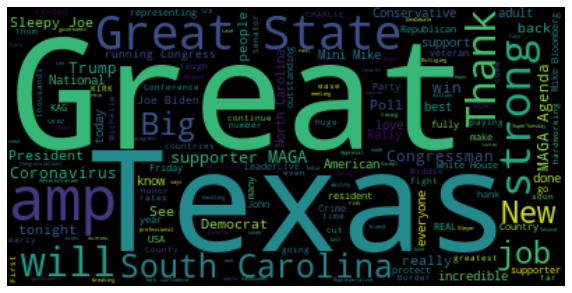

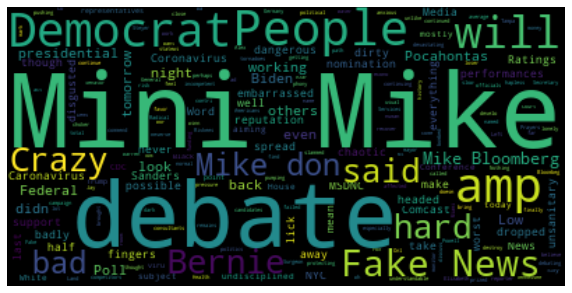

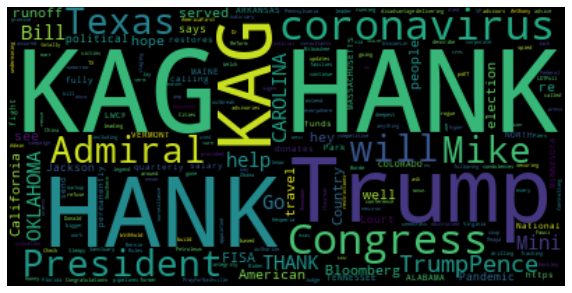

In [0]:
dft = df_tweets_pub

sentiment_label = 'sent_TextBlob'  #sent_score, sent_TextBlob

words_nature =' '.join([text for text in dft['tweets'][dft[sentiment_label] == 0]])
words_positive =' '.join([text for text in dft['tweets'][dft[sentiment_label] == 1]])
words_negative =' '.join([text for text in dft['tweets'][dft[sentiment_label] == -1]])
words_all= ' '.join([text for text in dft['tweets']])

from wordcloud import WordCloud, STOPWORDS

def wordcloud(tweets,col,words_c):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="black",stopwords=stopwords,random_state = 2020, max_font_size=110).generate(words_c)
    plt.figure( figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

wordcloud(dft,'tweets',words_positive) 
wordcloud(dft,'tweets',words_negative)
wordcloud(dft,'tweets',words_nature) 